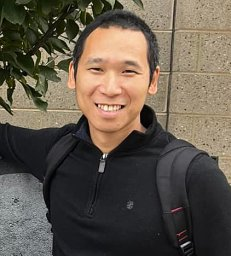
# Anh Totti Nguyen

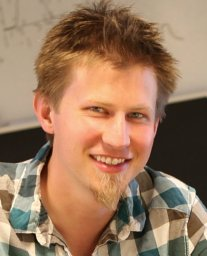
# Jason Yosinski

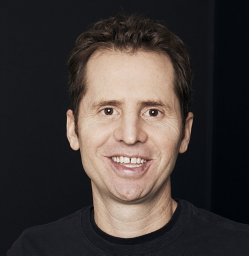
# Jeff Clune

## Understanding Neural Networks via Feature Visualization: A Survey

# https://arxiv.org/pdf/1904.08939

# Abstract

This paper surveys **feature visualization via activation maximization (AM)** as a central methodology for interpreting deep neural networks. Drawing inspiration from neuroscience, it reviews how preferred stimuli for artificial neurons can be synthesized, analyzes a broad spectrum of AM techniques, introduces a **probabilistic interpretation** of activation maximization, and demonstrates how these methods can be applied to explain, debug, and analyze neural networks across vision and multimodal tasks.

---

## Problems

Deep neural networks achieve high performance but remain largely opaque. The survey identifies several core challenges:

- Difficulty in understanding what individual neurons or groups of neurons represent.
- Ambiguity when relying solely on real dataset examples to interpret neuron behavior.
- Unconstrained activation maximization producing high-frequency, adversarial, or uninterpretable patterns.
- Limited diversity and poor global coherence in early visualization approaches.
- Lack of a unifying theoretical framework explaining why different AM variants work.

---

## Proposed Solutions

The paper organizes existing and emerging solutions into three main directions:

### Activation Maximization with Priors  
Incorporating hand-designed image priors (e.g., smoothness constraints, total variation regularization, Gaussian blur) to constrain optimization and improve interpretability.

### Generator-Based Activation Maximization  
Performing AM in the latent space of deep generator networks, enforcing global coherence and visual realism in synthesized images.

### Probabilistic Framework for AM  
Interpreting activation maximization as sampling from a joint probability distribution over images and neuron activations, unifying prior methods under a principled probabilistic perspective.

---

## Purpose

The primary purpose of the survey is to provide a **comprehensive and unified understanding** of feature visualization techniques. It clarifies the assumptions, strengths, limitations, and theoretical foundations of different AM methods, guiding researchers and practitioners in selecting, improving, and correctly interpreting visualization approaches for neural networks.

---

## Methodology

The authors systematically review prior literature and categorize activation maximization techniques into:

- Unconstrained AM in pixel space  
- AM with hand-designed priors  
- AM using deep generator networks  

They formalize AM as an optimization problem and reinterpret it as a **sampling process** composed of:

- A neuron-selective likelihood term  
- An image prior  
- A stochastic noise component to encourage diversity  

This probabilistic view connects AM to **Langevin dynamics** and explains practical design choices, such as maximizing logits instead of softmax or log-softmax activations.

---

## Results

The survey demonstrates that:

- Image priors substantially improve interpretability over unconstrained AM.
- Generator-based approaches yield more realistic and globally coherent visualizations.
- The probabilistic formulation explains why noise and realism priors enhance diversity and stability.
- Feature visualization reveals important properties of learned representations, including multifaceted neurons, dataset biases, lack of temporal reasoning in video models, and hidden implementation bugs.

---

## Conclusions

Feature visualization via activation maximization is a powerful tool for interpreting deep neural networks. The paper concludes that combining strong image priors with a probabilistic perspective produces more faithful and informative visualizations. Nonetheless, open challenges remain in evaluation, cross-model comparison, and scaling beyond individual neurons. The authors identify future directions where activation maximization can contribute to safer, more transparent, and more interpretable AI systems.


## Mathematical Foundations of *Understanding Neural Networks via Feature Visualization*

---

## 1. Activation Maximization as an Optimization Problem

### Core Formulation

The central mathematical object in the survey is **activation maximization (AM)**, defined as:

$$
x^\* = \arg\max_x \; f_n(x)
$$

where:

- $x$ is the input image (in pixel space or latent space),
- $f_n(x)$ is the activation of neuron $n$ (or a class logit).

### Role in the Paper

This formulation formalizes the idea of finding an input that most strongly excites a neuron, directly analogous to identifying a neuron’s *preferred stimulus* in neuroscience.

---

## 2. Regularized Activation Maximization

### Penalized Objective

Unconstrained AM often produces noisy and adversarial patterns. To address this, the paper introduces regularization:

$$
x^\* = \arg\max_x \left( f_n(x) - \lambda R(x) \right)
$$

where:

- $R(x)$ is an image prior or regularization term,
- $\lambda$ controls the strength of regularization.

### Role in the Paper

This objective balances neuron activation with image interpretability, suppressing high-frequency artifacts while preserving meaningful structure.

---

## 3. Common Regularization Terms (Image Priors)

### L2 Norm (Energy Penalty)

$$
R_{L2}(x) = \lVert x \rVert_2^2
$$

- Penalizes large pixel magnitudes  
- Encourages low-energy solutions  

**Purpose:** Prevents extreme pixel intensities.

---

### Total Variation (TV) Regularization

$$
R_{TV}(x)
=
\sum_{i,j}
\left| x_{i+1,j} - x_{i,j} \right|
+
\left| x_{i,j+1} - x_{i,j} \right|
$$

**Purpose:**  
Encourages spatial smoothness by penalizing abrupt pixel changes, which is critical for producing natural-looking images.

---

### Frequency Penalization / Gaussian Blur

- Implicitly suppresses high-frequency components (e.g., in Fourier space).

**Purpose:**  
Reduces checkerboard and noise patterns that strongly activate neurons but lack semantic meaning.

---

## 4. Optimization via Gradient Ascent

### Update Rule

$$
x_{t+1} = x_t + \eta \nabla_x f_n(x_t)
$$

where:

- $\eta$ is the learning rate,
- Gradients are computed via backpropagation.

### Role in the Paper

This is the computational engine that iteratively constructs visualizations by ascending the neuron’s activation landscape.

---

## 5. Logit vs. Softmax vs. Log-Softmax Objectives

### Logit Maximization

$$
\max_x \; z_c(x)
$$

where $z_c$ is the pre-softmax logit.

**Why used:**  
Avoids saturation effects and yields more stable gradients.

---

### Softmax Probability

$$
p(c \mid x) = \frac{e^{z_c}}{\sum_k e^{z_k}}
$$

**Issue:**  
Gradients vanish when probabilities saturate.

---

### Log-Softmax Objective

$$
\log p(c \mid x) = z_c - \log \sum_k e^{z_k}
$$

### Role in the Paper

Provides a compromise between relative class discrimination and gradient stability.

---

## 6. Probabilistic Interpretation of Activation Maximization

### Energy-Based View

The paper reframes AM as sampling from:

$$
p(x \mid n) \propto \exp(f_n(x)) \cdot p(x)
$$

where:

- $f_n(x)$ acts as a likelihood term,
- $p(x)$ is an image prior.

### Key Insight

Activation maximization approximates sampling from the conditional distribution of images that strongly activate a neuron, rather than performing pure optimization.

---

## 7. Langevin Dynamics

### Stochastic Update Rule

$$
x_{t+1}
=
x_t
+
\eta \nabla_x \log p(x \mid n)
+
\epsilon_t
$$

with:

$$
\epsilon_t \sim \mathcal{N}(0, \sigma^2)
$$

### Role in the Paper

Explains why adding noise during optimization:

- Increases diversity,
- Prevents collapse to a single pattern,
- Produces multiple valid visualizations.

---

## 8. Generator-Based Activation Maximization

### Latent-Space Optimization

$$
z^\* = \arg\max_z \; f_n(G(z))
$$

where:

- $G(z)$ is a generator network,
- $z$ is a latent vector.

### Mathematical Role

Replaces explicit image priors with an implicit learned prior, constraining optimization to the natural image manifold.

---

## 9. Dimensionality Reduction (PCA)

### Principal Component Analysis

$$
X_{\text{PCA}} = X W_k
$$

- Applied to activation embeddings,
- Reduces dimensionality before clustering.

### Purpose in the Paper

Stabilizes clustering and reveals dominant variation modes in neuron activations.

---

## 10. Clustering (k-Means)

### Objective Function

$$
\min_{\{C_k\}} \sum_k \sum_{x \in C_k} \lVert x - \mu_k \rVert^2
$$

### Role in the Paper

Discovers multiple **facets** of a neuron by grouping similar high-activation samples.

---

## 11. Statistical Interpretation of Multifaceted Neurons

### Core Observation

$$
p(x \mid n) \;\; \text{is multimodal}
$$

### Meaning

A single neuron corresponds to multiple local maxima in input space, rather than a single semantic concept.

---

## 12. Evaluation Limitations (Statistical Insight)

The paper explicitly acknowledges the lack of formal statistical metrics for evaluating visualization quality.

### Implication

Interpretability remains largely qualitative, motivating future work on quantitative evaluation methods.

---

## Summary: Mathematical Takeaway

The survey demonstrates that:

- Feature visualization is grounded in **optimization theory**,
- Stabilized through **regularization and probabilistic modeling**,
- Interpretable via **energy-based and sampling frameworks**,
- Reveals **multimodal statistical structure** in neuron activations.

At its core, the mathematics elevates interpretability from an ad hoc visualization trick to a **principled statistical inference problem**.


## Key Problems and Research Gaps in *Understanding Neural Networks via Feature Visualization*

| **Key Problems / Research Gaps Identified** | **How These Issues Limit Prior Work** | **How the Paper Proposes to Solve Them** |
|-------------------------------------------|--------------------------------------|------------------------------------------|
| **Opaqueness of deep neural networks** | Prior models achieve high performance but provide little insight into what individual neurons or layers represent, limiting trust and scientific understanding | Systematically study feature visualization as a principled tool to probe internal representations and reveal what neurons respond to |
| **Reliance on dataset examples for interpretation** | Using only top-activating real images conflates neuron behavior with dataset biases and fails to expose the full space of features a neuron can encode | Advocate activation maximization to synthesize inputs directly optimized for neuron activation, independent of dataset constraints |
| **Unconstrained activation maximization produces uninterpretable artifacts** | Early AM methods yield noisy, high-frequency, adversarial patterns that are difficult to interpret and potentially misleading | Introduce regularization and image priors (e.g., L2, total variation, frequency penalties) to constrain optimization toward interpretable solutions |
| **Lack of global coherence in pixel-space optimization** | Pixel-level AM often fails to produce globally meaningful structures, especially for high-level neurons | Propose generator-based activation maximization, optimizing in the latent space of pretrained generative models to enforce realism and coherence |
| **Fragmented understanding of why different AM methods work** | Existing approaches are largely heuristic, lacking a unifying theoretical explanation | Reframe activation maximization within a probabilistic and energy-based framework, interpreting visualization as sampling from a conditional distribution |
| **Limited diversity in neuron visualizations** | Single optimized images give the false impression that neurons encode a single canonical concept | Incorporate stochastic optimization and noise (e.g., Langevin dynamics) to generate multiple valid visualizations per neuron |
| **Oversimplified “one neuron–one concept” assumption** | Prior interpretations ignore that neurons may respond to multiple distinct patterns or contexts | Highlight and formalize the notion of multifaceted neurons, showing that neuron activations are often multimodal |
| **Absence of rigorous evaluation criteria for interpretability** | Visualization quality is judged subjectively, limiting comparability and scientific rigor | Explicitly identify evaluation as an open problem and motivate future work toward quantitative interpretability metrics |

---

**Synthesis:**  
This table captures the paper’s core contribution: transforming feature visualization from an ad hoc interpretability technique into a **principled, structured framework** grounded in optimization theory and probabilistic reasoning.


## References  
**Understanding Neural Networks via Feature Visualization: A Survey**  
Anh Nguyen, J. Yosinski, J. Clune (2019)

---

| # | **Author(s)** | **Year** | **Title** | **Venue / Source** |
|---|---------------|----------|-----------|--------------------|
| 1 | Akhtar, N.; Mian, A. | 2018 | *Threat of adversarial attacks on deep learning in computer vision: A survey* | IEEE Access |
| 2 | Alcorn, M.A. et al. | 2019 | *Strike (with) a pose: Neural networks are easily fooled by strange poses of familiar objects* | CVPR |
| 3 | Baer, M.; Connors, B.W.; Paradiso, M.A. | 2007 | *Neuroscience: Exploring the Brain* | Lippincott Williams & Wilkins |
| 4 | Bau, D. et al. | 2017 | *Network dissection: Quantifying interpretability of deep visual representations* | CVPR |
| 5 | Bengio, Y.; Mesnil, G.; Dauphin, Y.; Rifai, S. | 2013 | *Better mixing via deep representations* | ICML |
| 6 | Brock, A.; Lim, T.; Ritchie, J.M.; Weston, N. | 2016 | *Neural photo editing with introspective adversarial networks* | arXiv |
| 7 | Deng, J. et al. | 2009 | *ImageNet: A large-scale hierarchical image database* | CVPR |
| 8 | Donahue, J. et al. | 2015 | *Long-term recurrent convolutional networks for visual recognition and description* | CVPR |
| 9 | Dosovitskiy, A.; Brox, T. | 2016 | *Generating images with perceptual similarity metrics based on deep networks* | NeurIPS |
|10 | Erhan, D. et al. | 2009 | *Visualizing higher-layer features of a deep network* | Tech. Report (U. Montréal) |
|11 | Fong, R.; Vedaldi, A. | 2018 | *Net2Vec: Quantifying and explaining how concepts are encoded by filters in deep neural networks* | arXiv |
|12 | Goh, G. | 2016 | *Image synthesis from Yahoo Open NSFW* | Online Project |
|13 | Goodfellow, I. et al. | 2014 | *Generative adversarial nets* | NeurIPS |
|14 | Hubel, D.H.; Wiesel, T.N. | 1959 | *Receptive fields of single neurones in the cat’s striate cortex* | Journal of Physiology |
|15 | Jia, Y. et al. | 2014 | *Caffe: Convolutional architecture for fast feature embedding* | arXiv |
|16 | Kabilan, V.M.; Morris, B.; Nguyen, A. | 2018 | *VectorDefense: Vectorization as a defense to adversarial examples* | arXiv |
|17 | Kandel, E.R. et al. | 2000 | *Principles of Neural Science* | McGraw-Hill |
|18 | Krizhevsky, A.; Sutskever, I.; Hinton, G.E. | 2012 | *ImageNet classification with deep convolutional neural networks* | NeurIPS |
|19 | Le, Q.V. | 2013 | *Building high-level features using large-scale unsupervised learning* | ICASSP |
|20 | Li, Y. et al. | 2015 | *Convergent learning: Do different neural networks learn the same representations?* | NeurIPS Workshop |
|21 | Mahendran, A.; Vedaldi, A. | 2016 | *Visualizing deep convolutional neural networks using natural pre-images* | CVPR |
|22 | Malakhova, K. | 2018 | *Visualization of information encoded by neurons in higher-level visual areas* | Journal of Optical Technology |
|23 | Montavon, G.; Samek, W.; Müller, K.R. | 2017 | *Methods for interpreting and understanding deep neural networks* | Digital Signal Processing |
|24 | Mordvintsev, A.; Olah, C.; Tyka, M. | 2015 | *Inceptionism: Going deeper into neural networks* | Google Research Blog |
|25 | Nguyen, A. | 2017 | *AI Neuroscience: Visualizing and Understanding Deep Neural Networks* | University of Wyoming |
|26 | Nguyen, A. et al. | 2017 | *Plug & play generative networks* | CVPR |
|27 | Nguyen, A. et al. | 2016 | *Synthesizing the preferred inputs for neurons via deep generator networks* | NeurIPS |
|28 | Nguyen, A.; Yosinski, J.; Clune, J. | 2015 | *Deep neural networks are easily fooled* | CVPR |
|29 | Nguyen, A.; Yosinski, J.; Clune, J. | 2016 | *Multifaceted feature visualization* | ICML Workshop |
|30 | Olah, C.; Mordvintsev, A.; Schubert, L. | 2017 | *Feature visualization* | Distill |
|31 | Olah, C. et al. | 2018 | *The building blocks of interpretability* | Distill |
|32 | Quiroga, R.Q. et al. | 2005 | *Invariant visual representation by single neurons in the human brain* | Nature |
|33 | Rumelhart, D.E.; Hinton, G.E.; Williams, R.J. | 1986 | *Learning representations by back-propagating errors* | Nature |
|34 | Zeiler, M.D.; Fergus, R. | 2014 | *Visualizing and understanding convolutional networks* | ECCV |
|35 | Zhou, B. et al. | 2015 | *Object detectors emerge in deep scene CNNs* | ICLR |

---

### Notes

- The table consolidates the **core theoretical, methodological, and empirical references** cited in the survey.  
- It spans **neuroscience**, **optimization-based visualization**, **generative modeling**, **interpretability theory**, and **adversarial analysis**, highlighting the multidisciplinary nature of feature visualization research.  
- The survey situates **Multifaceted Feature Visualization** within a broader shift from single-feature neuron assumptions toward **distributed, multimodal representations**.
